<a href="https://colab.research.google.com/github/Josh-Raj/Parkinsons-Telemonitoring/blob/main/Parkinson's_Telemonitoring_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. [Dataset Link From Kaggle](https://www.kaggle.com/datasets/rishidamarla/parkinsons-telemonitoring-data?resource=download)
2. [Dataset Link from UCI](https://data.world/uci/parkinsons/workspace/project-summary?agentid=uci&datasetid=parkinsons)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/telemonitoring_parkinsons_updrs_data.csv")

# **Understandings**

## Exploration

In [4]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [6]:
df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


## Visualization

1. Plot histograms and KDE (Kernel Density Estimate) plots to see the distribution of the target variables.
2. This will help understand if the target values are skewed, normally distributed, or have outliers.

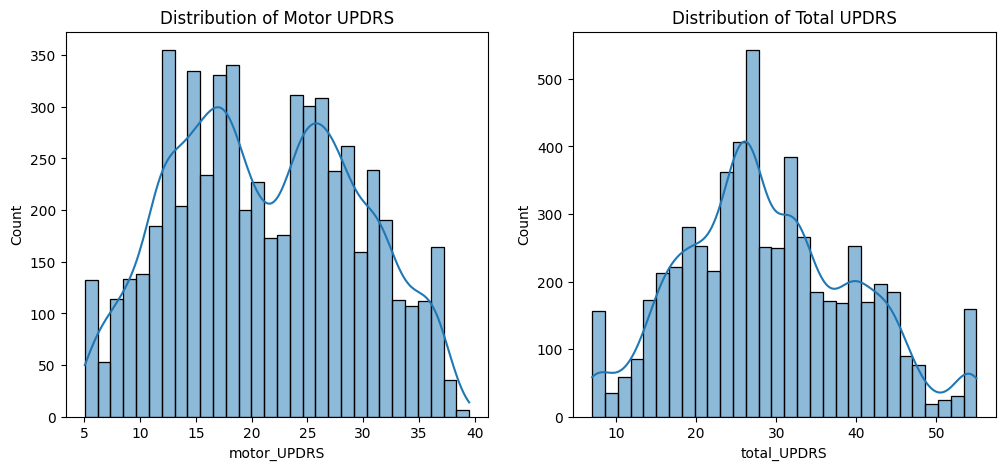

In [7]:
# Histogram of motor_UPDRS and total_UPDRS
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(df['motor_UPDRS'], kde=True, bins=30)
plt.title('Distribution of Motor UPDRS')

plt.subplot(1, 2, 2)
sns.histplot(df['total_UPDRS'], kde=True, bins=30)
plt.title('Distribution of Total UPDRS')

plt.show()

1. Use a heatmap to visualize the correlation between the 16 voice measures and the target variables (motor_UPDRS, total_UPDRS).
2. This will help identify which features have a strong linear relationship with the target variables.

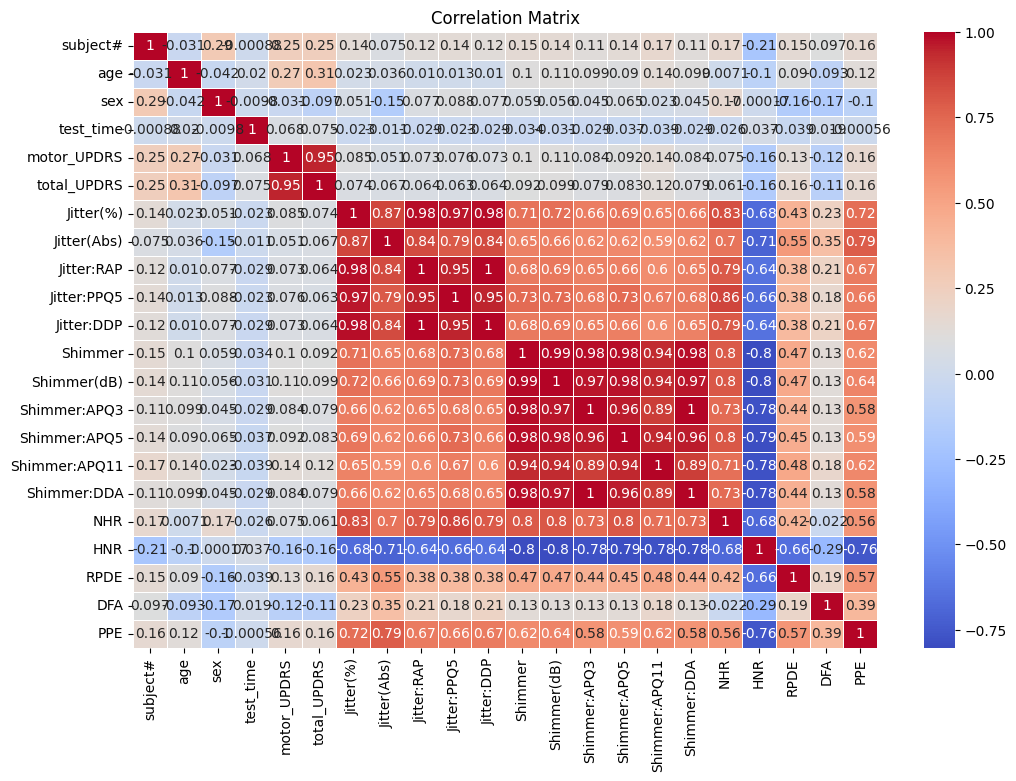

In [8]:
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Initial Findings
1. Dataset has 22 columns and 5876 rows

1. We need to predict 2 variables (motor_UPDRS,
total_UPDRS)

1. the following columns have high correlation and are needed for prediction:
* motor_UPDRS total_UPDRS
* jitter(%) jitter(Abs) jitter:RAP Jitter:PPQ5 jitter:DDP
* Shimmer Shimmer(dB) Shimmer:APQ3 Shimmer:APQ5 Shimmer:APQ11 Shimmer:DDA
* NHR HNR RPDE PPE
4. we can remove the other columns as they dont have high correlation

1. Need to do feature scaling because not all values are in equal ranges
1. Need to do feature selection to use important columns for prediction
1.

# Data Preparation

In [9]:
# Drop columns subject#, age, sex, test_time and DFA
df.drop(['subject#', 'age', 'sex', 'test_time', 'DFA'], axis=1, inplace=True)

In [24]:
df

,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,PPE
0,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.16006
1,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.10810
2,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.21014
3,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.33277
4,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.21367
5871,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.12621
5872,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.14157
5873,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.14204


In [12]:
# Split the data into training and testing sets
X = df.drop(['motor_UPDRS', 'total_UPDRS'], axis=1)
y = df[['motor_UPDRS', 'total_UPDRS']]  # Target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X_train)
print(y)

[[-0.11274805  0.14196131 -0.06388084 ... -1.3537567   0.08246429
   0.21389789]
 [-0.38727575 -0.02428233 -0.44436189 ... -0.03863353  0.41080485
   0.33894003]
 [ 0.2502181  -0.11320994  0.35700528 ... -0.88789656  1.07124297
   0.62137407]
 ...
 [-0.31910444 -0.54991811 -0.26253909 ... -0.18561241  0.07148994
  -0.41991765]
 [-0.13670013 -0.12708718 -0.35681758 ...  0.65200412  0.74685712
  -0.17026905]
 [-0.07405623  0.06152997 -0.05377957 ... -0.65519942  0.12023186
   0.23459302]]
      motor_UPDRS  total_UPDRS
0          28.199       34.398
1          28.447       34.894
2          28.695       35.389
3          28.905       35.810
4          29.187       36.375
...           ...          ...
5870       22.485       33.485
5871       21.988       32.988
5872       21.495       32.495
5873       21.007       32.007
5874       20.513       31.513

[5875 rows x 2 columns]


In [13]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
y_train = scaler.fit_transform(X_train)
y_test = scaler.transform(X_test)

In [ ]:
# # Dimensionality Reduction to test later if accuracy is low
# from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# Model Selection

## Model 1: Multiple Linear Regression

In [34]:
# Model 1: Multiple Linear Regression as we have 2 output variables to predict
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Make Predictions
y_pred = model.predict(X_test)

## Model 2 Ridge Regression (for multicollinearity)

In [38]:
# Model 2
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [39]:
# Make Predictions
y_pred_ridge = ridge_model.predict(X_test)

## Model 3: Random Forest Regression (for non-linearity and multicollinearity)

In [41]:
# Model 3
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
# Make Predictions
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation

1. MSE measures how far your predictions are from the actual values. the lower the better
2. R-squared is for checking how well the variance is explained

In [36]:
# Check accuracy of Model 1
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 9.82087366858846e-30
R-squared: 1.0


this has a very low MSE implying that predictions are very accurate to actual value


In [40]:
# Check accuracy of Model 2
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"R-squared (Ridge): {r2_ridge}")

Mean Squared Error (Ridge): 1.8591402322879856e-06
R-squared (Ridge): 0.9999984637154145


In [43]:
# Check accuracy of Model 3
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"R-squared (Random Forest): {r2_rf}")

Mean Squared Error (Random Forest): 0.04711626324479838
R-squared (Random Forest): 0.959585213676378


# Conclusion

Model 1 has explained the variance very well with predictions being very close to actual values
It is overfitting because probably because of lack of regularization or presence of features that are highly correlated making it redundant to train extra features  


Model 2 has also explaiend the variance very well and gives very low MSE error using ridge regression.
It is a good fit for multicollinearity and overcomes the problem of overfitting present in Model 1


Model 3 using random forest regression was used to check for non-linearity. since the R-Squared showed 96% variance explanation, non-linearity is not a major factor that affects the output of the data

Thus, Model 2 is the best choice